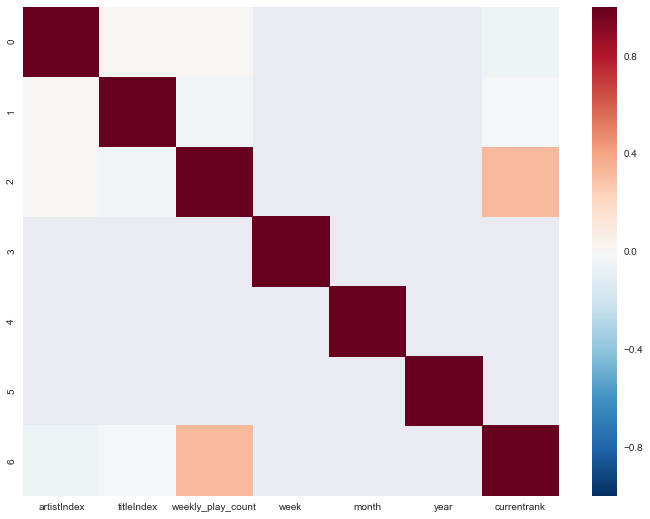

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from data import load, get_training_data
from datetime import datetime
from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

load(sqlContext, spark)

df = get_training_data(spark, datetime(2017,3,1))

artistInd = StringIndexer(inputCol="artist", outputCol="artistIndex").setHandleInvalid("skip")
titleInd = StringIndexer(inputCol="title", outputCol="titleIndex").setHandleInvalid("skip")
dayOfWeekInd = StringIndexer(inputCol="day_of_week", outputCol="dayOfWeekIndex").setHandleInvalid("skip")
assembler = VectorAssembler(inputCols=["artistIndex", "titleIndex", "weekly_play_count", "week", "month", "year","currentrank"], outputCol="features")

d = artistInd.fit(df).transform(df)
d = titleInd.fit(d).transform(d)
d = assembler.transform(d)

r = d.select("features").rdd.map(lambda data: Vectors.dense([str(c) for c in data[0]]))

corrmat = Statistics.corr(r, method="pearson")
df = pd.DataFrame(corrmat)
df.columns = ["artistIndex","titleIndex", "weekly_play_count", "week", "month", "year", "currentrank"]

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df)
